<h1>Cross Validation</h1>
Which machin learning method would be the best for a dataset???
logistic Regression? K-nearest neighbors? SVM? ....

**Cross Validation** allows us to compare different machine learning methods and get a sense of how well they will work in practice. 

Source: Statquest

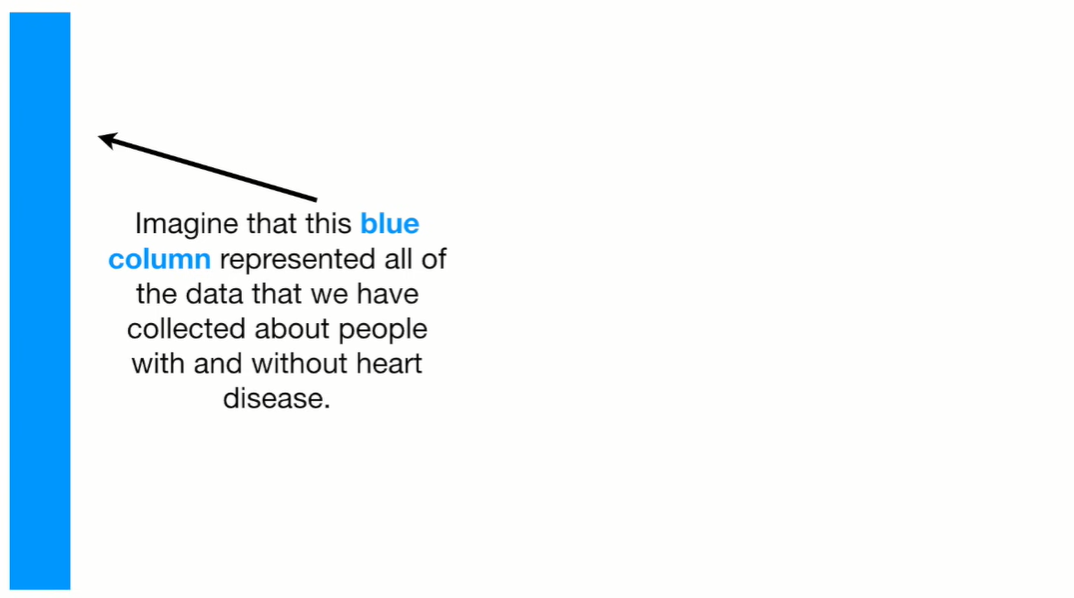
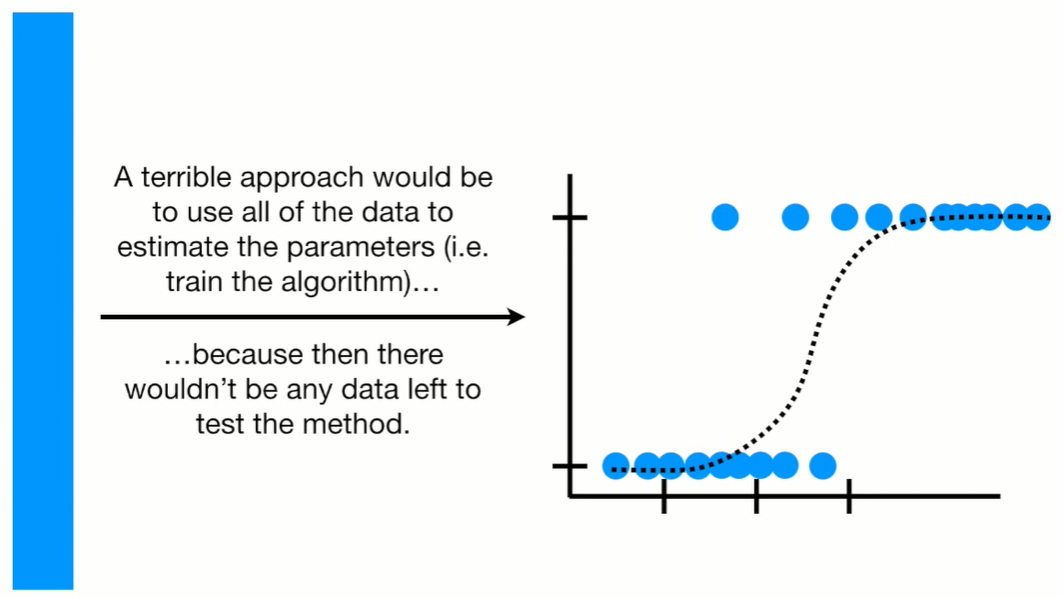
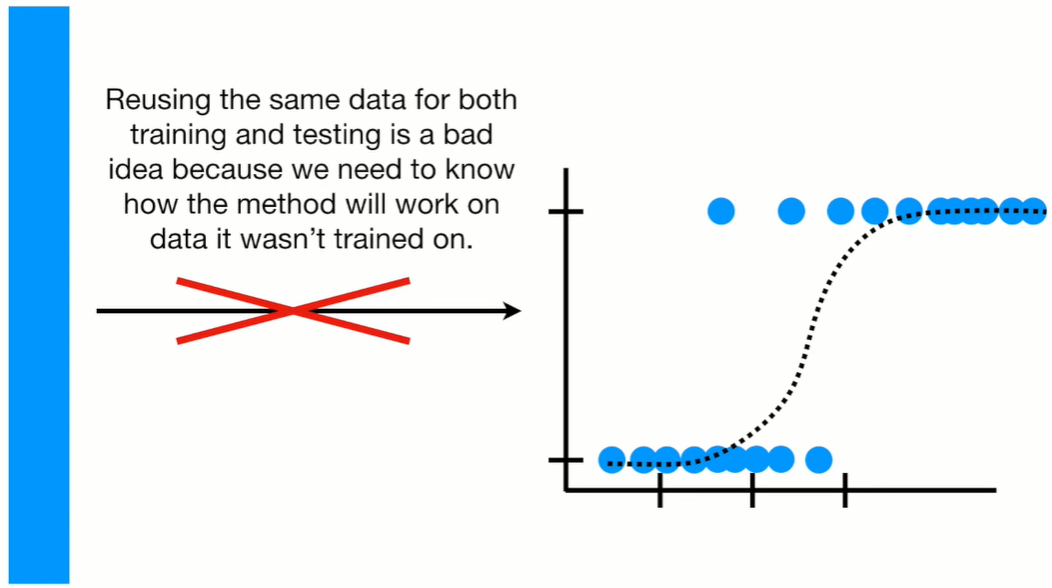
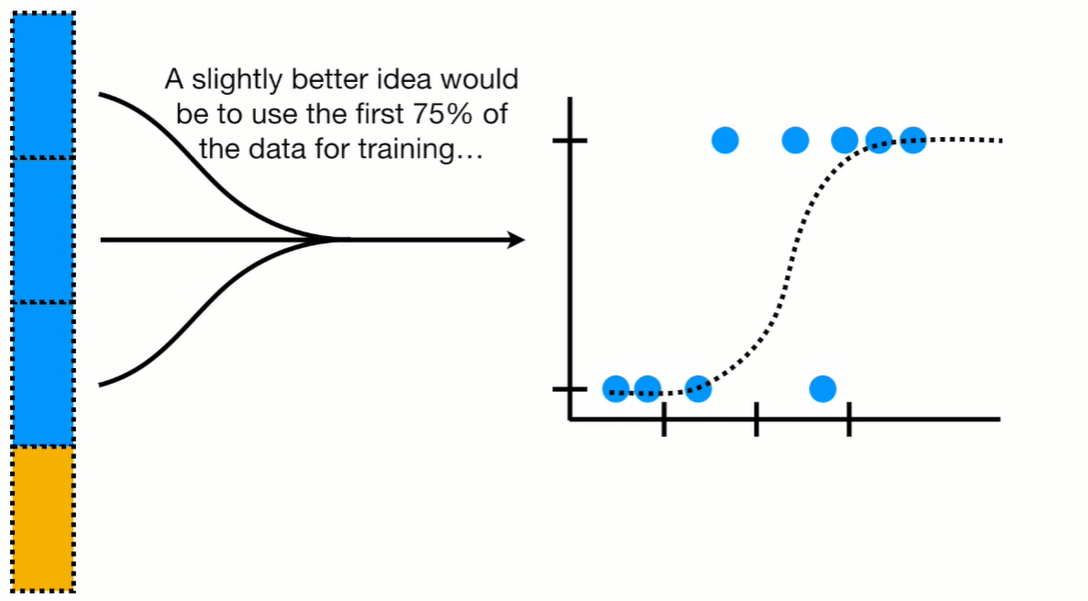
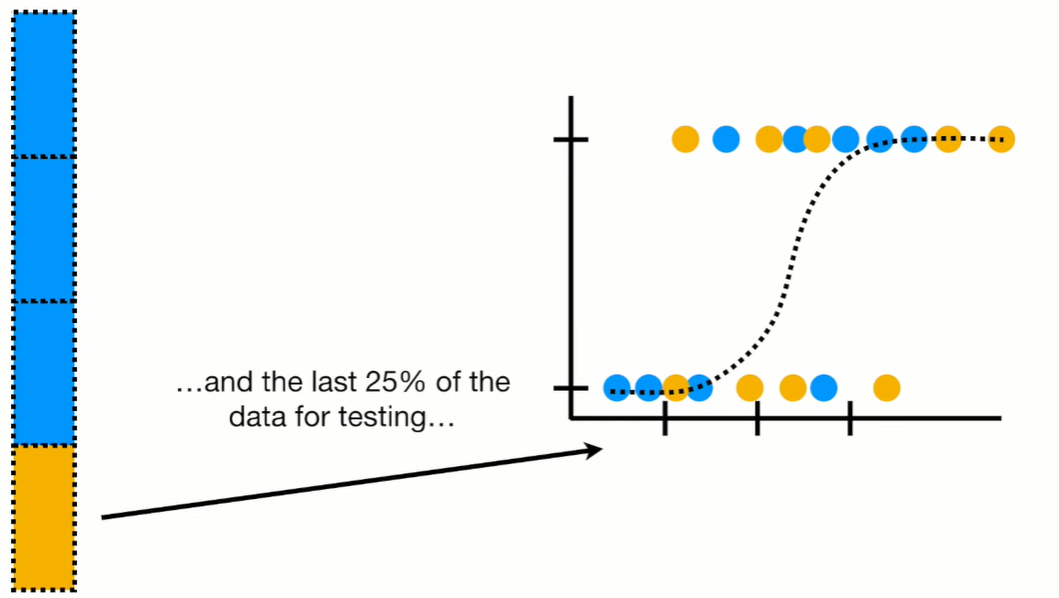
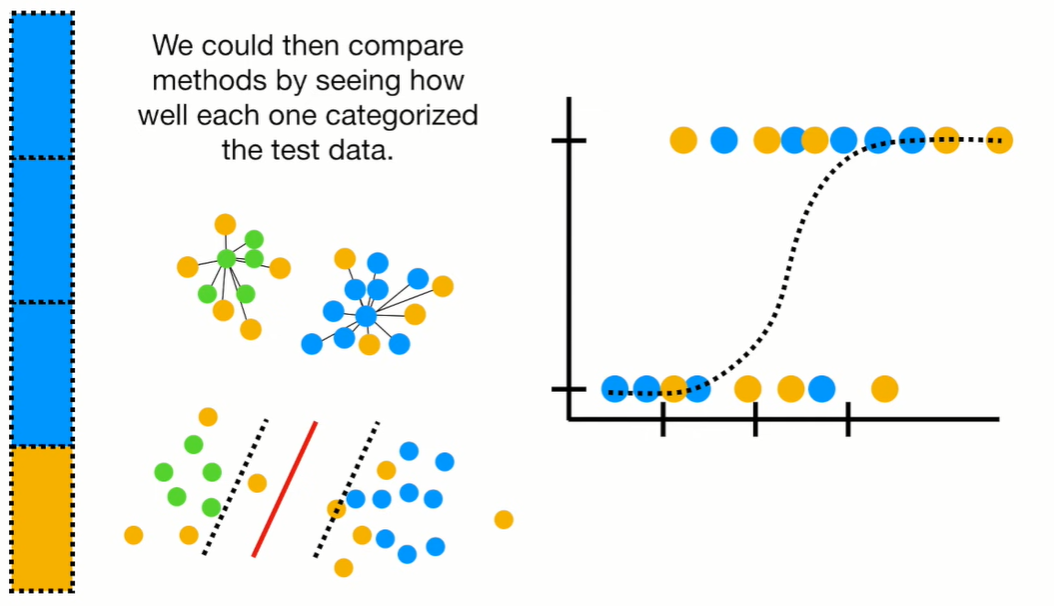
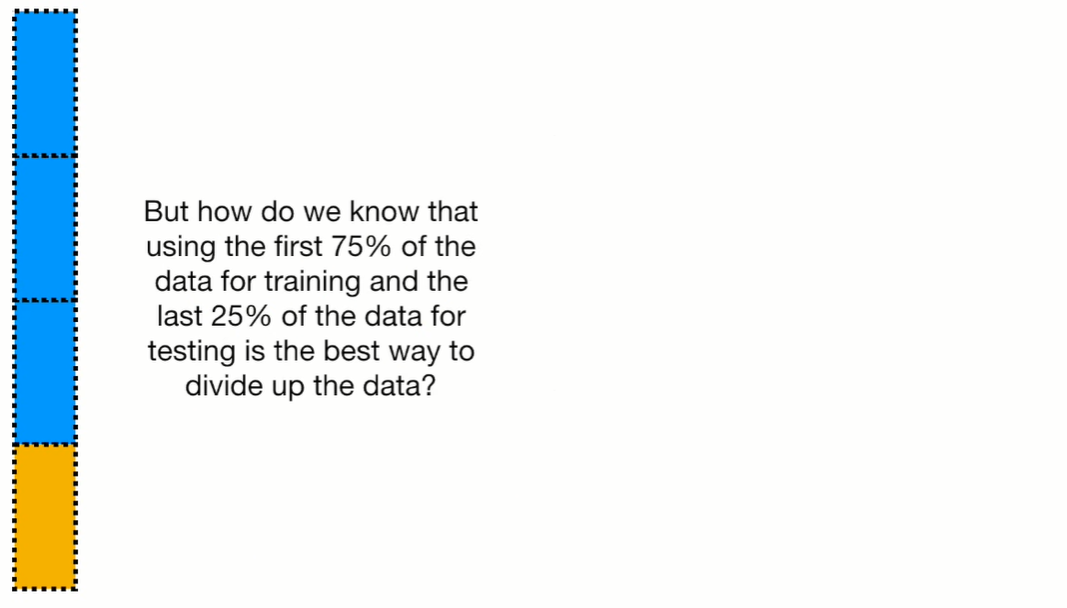
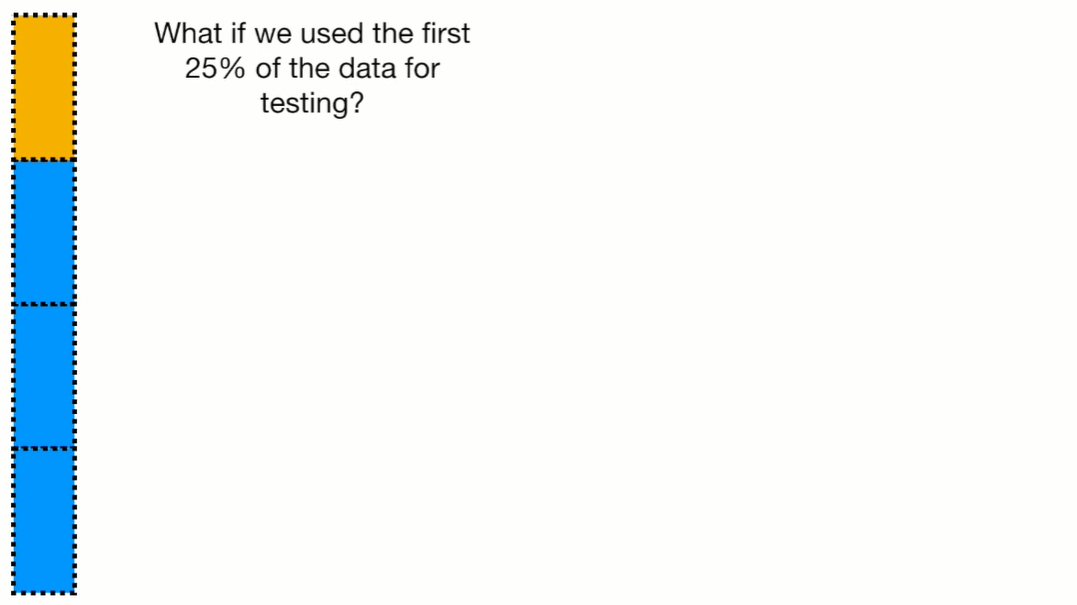
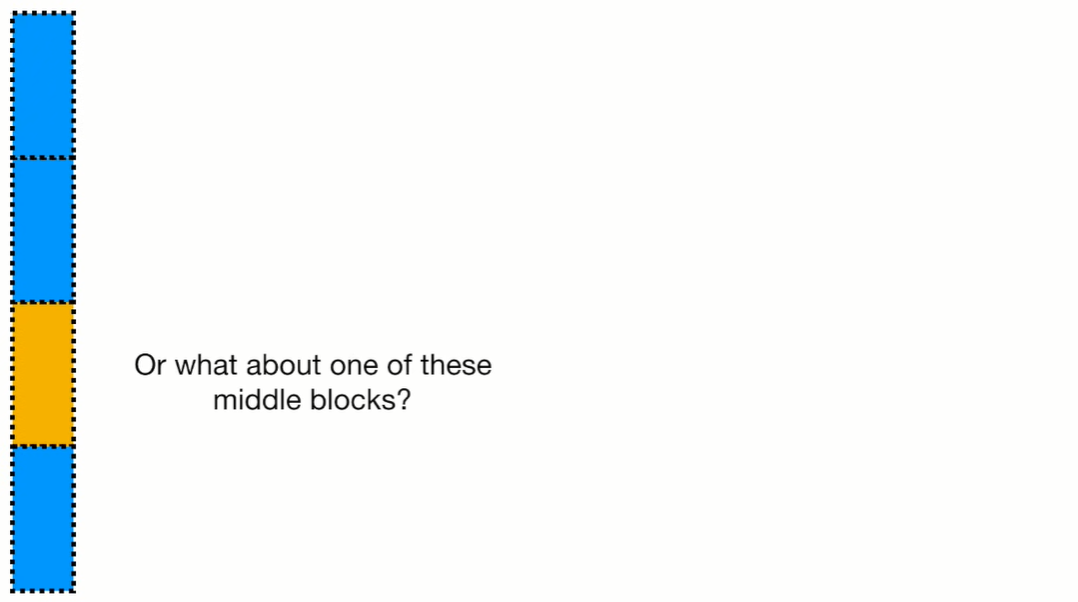
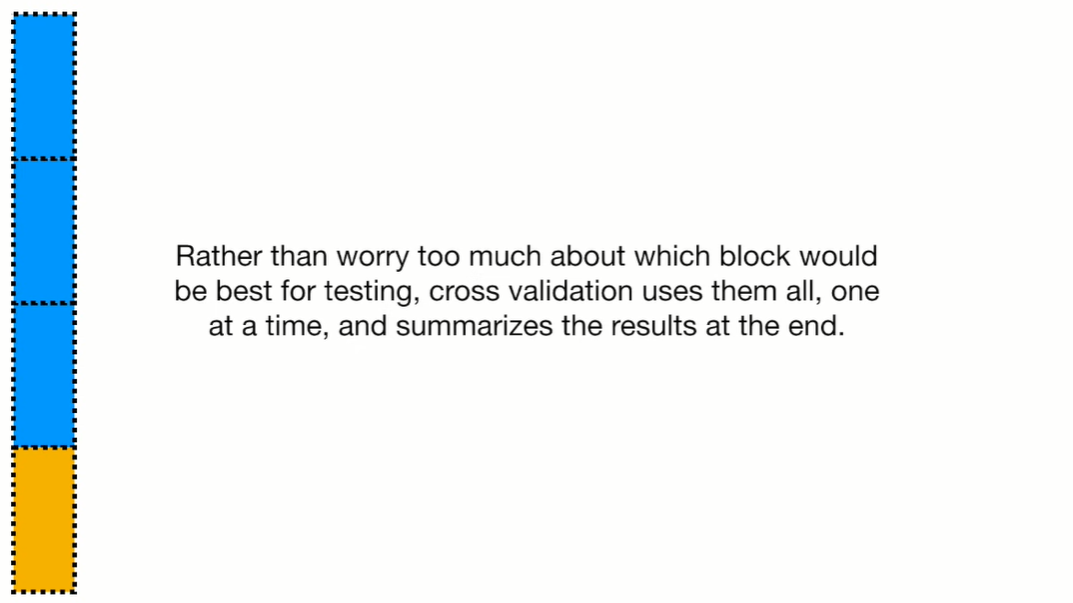
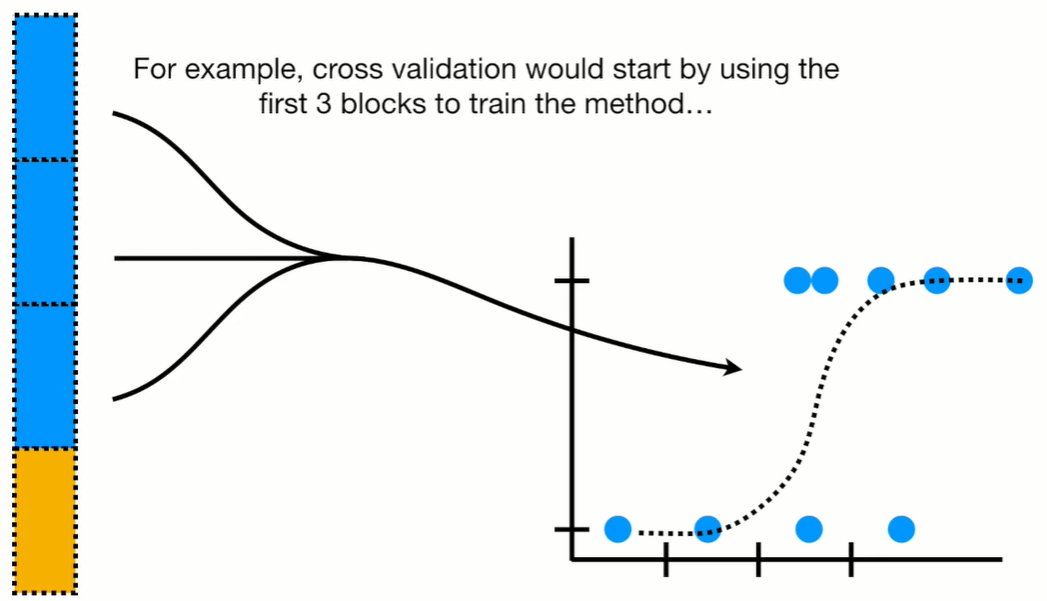
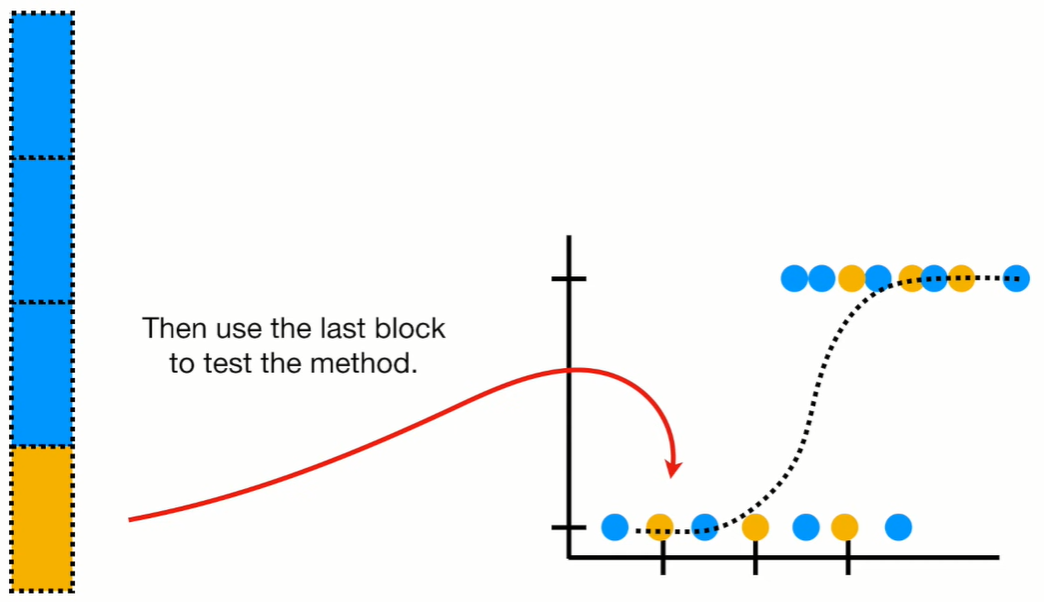
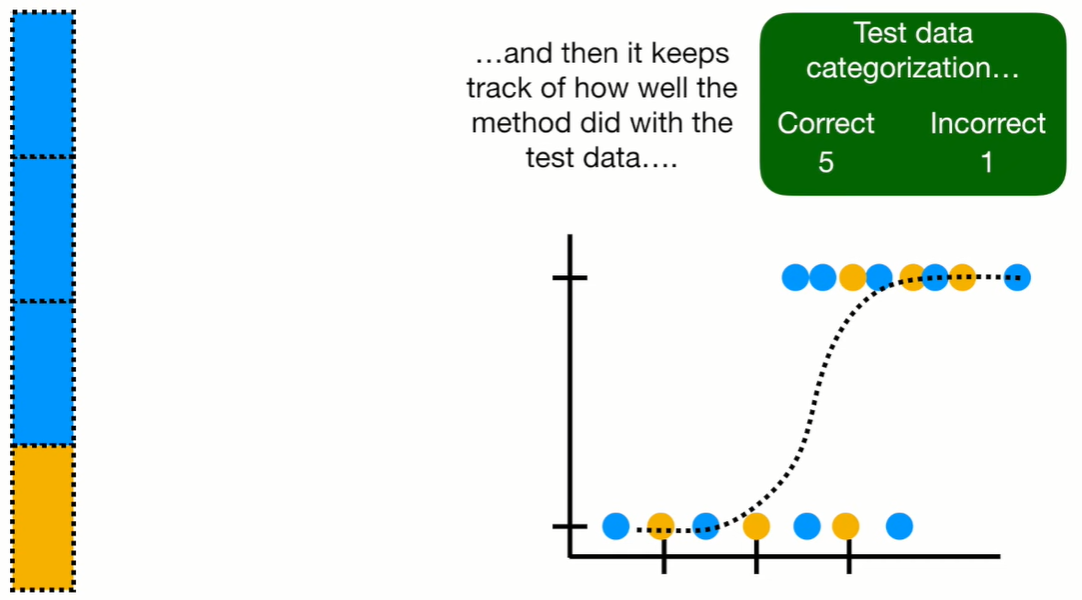
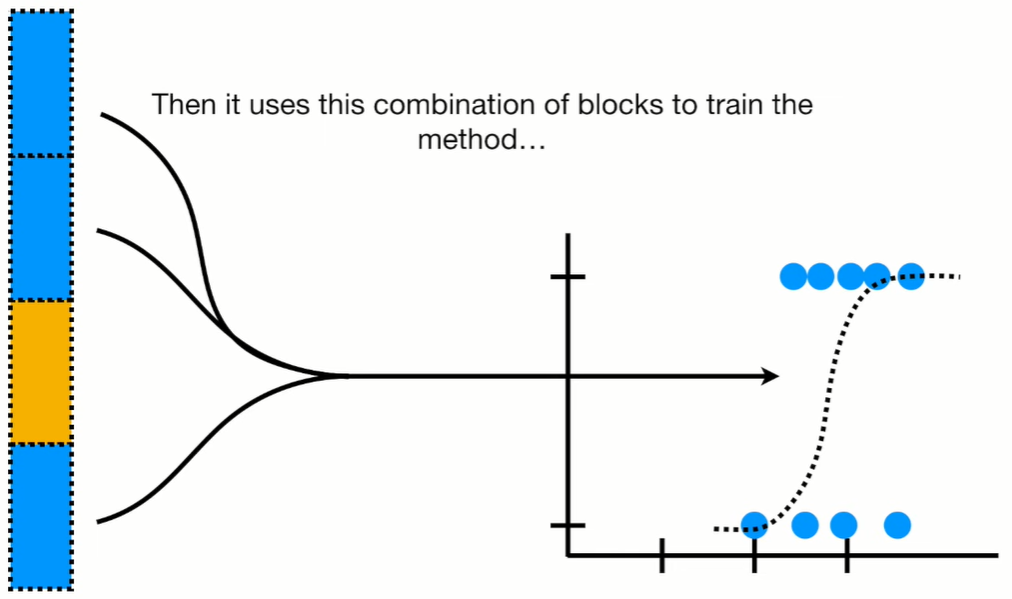
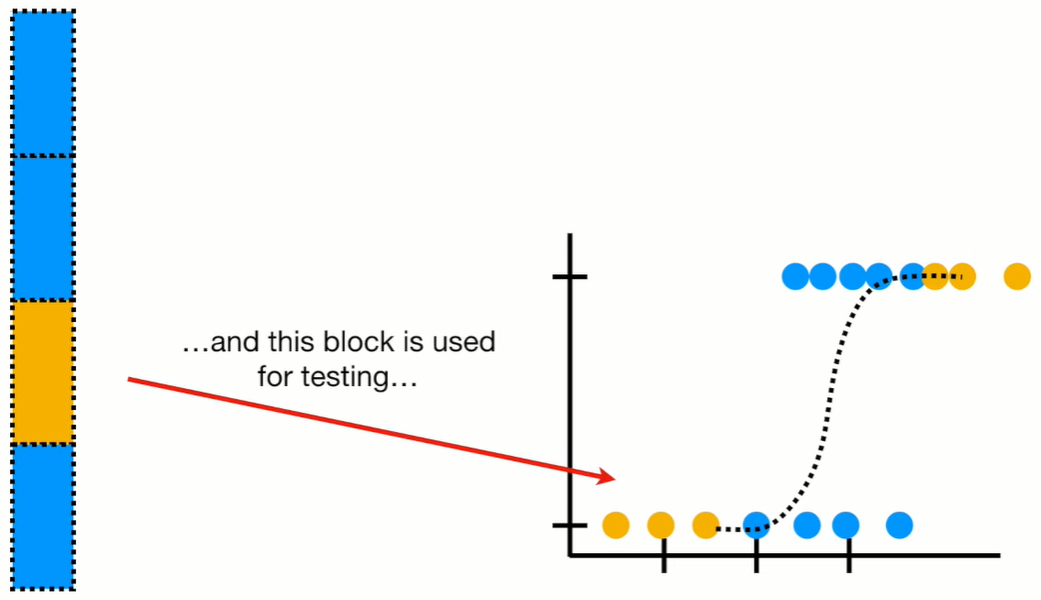
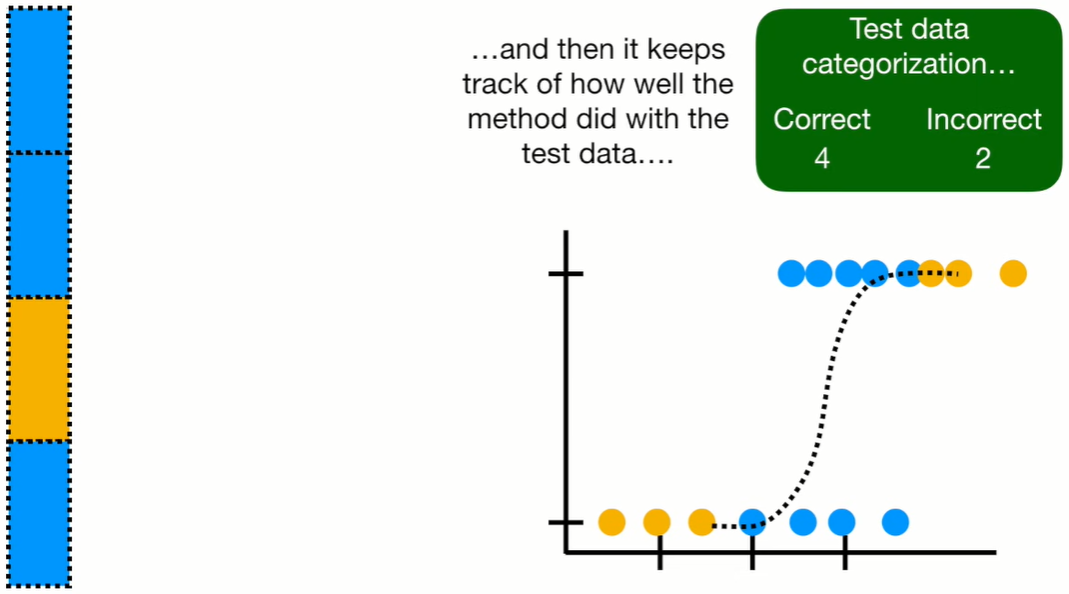
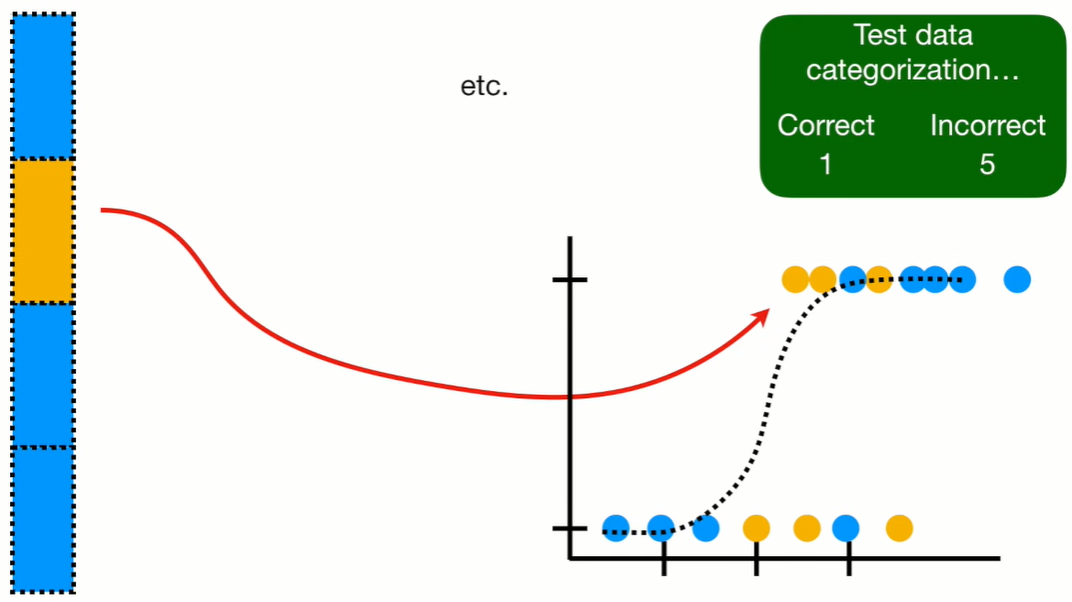
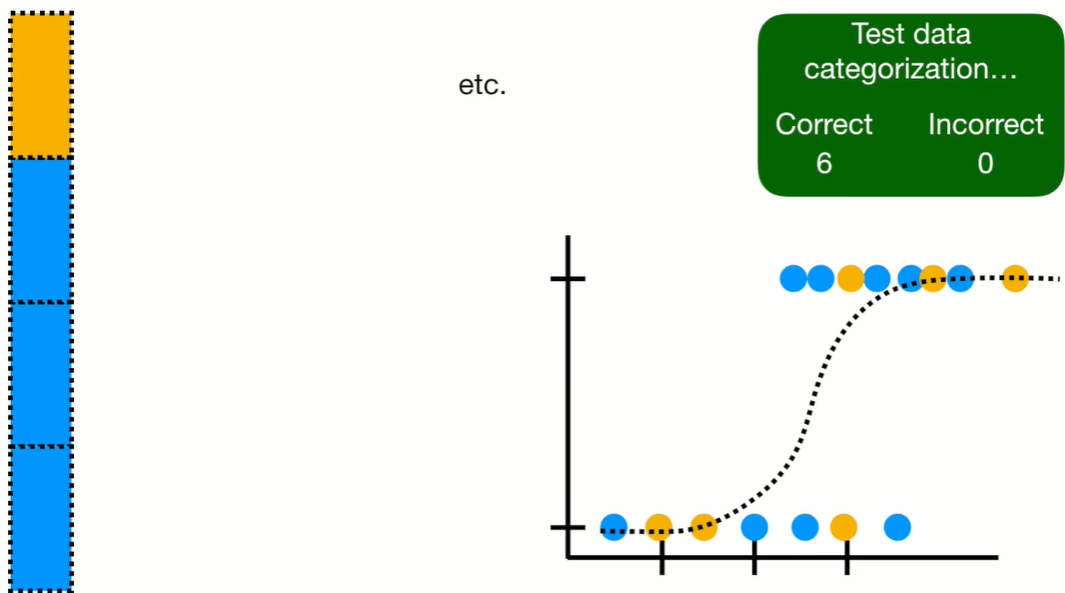
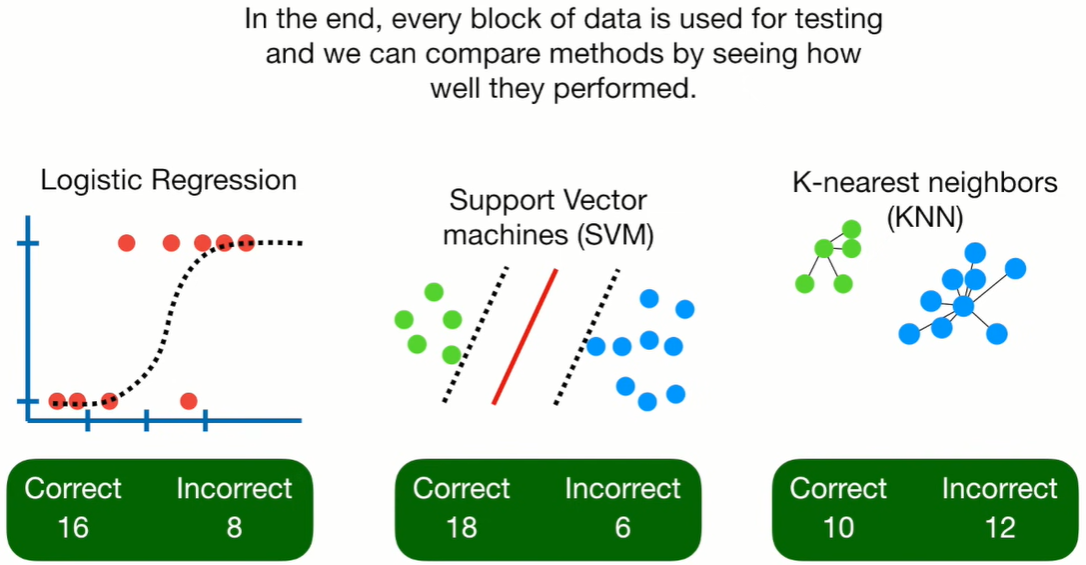
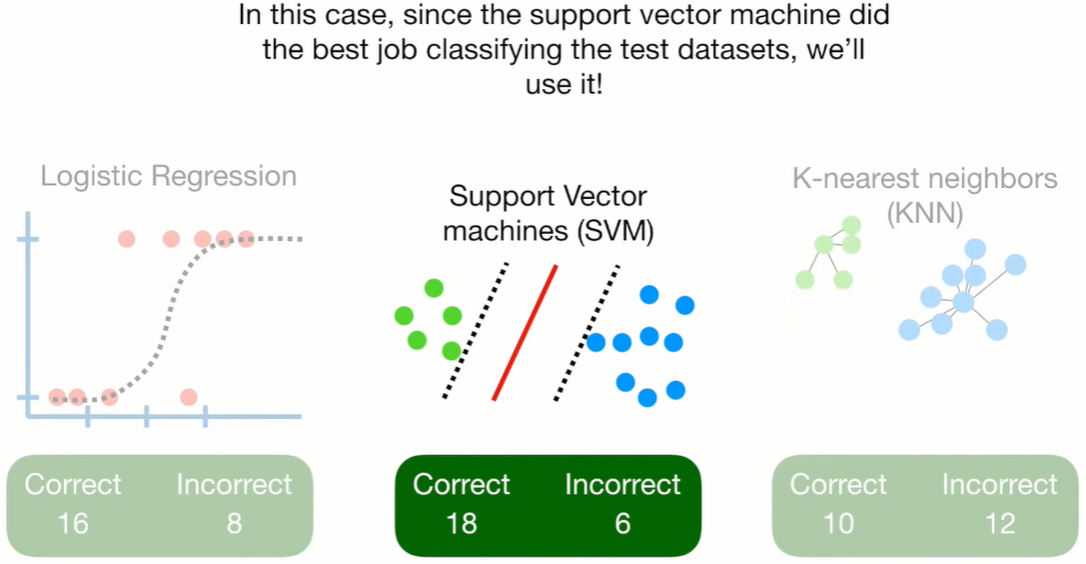
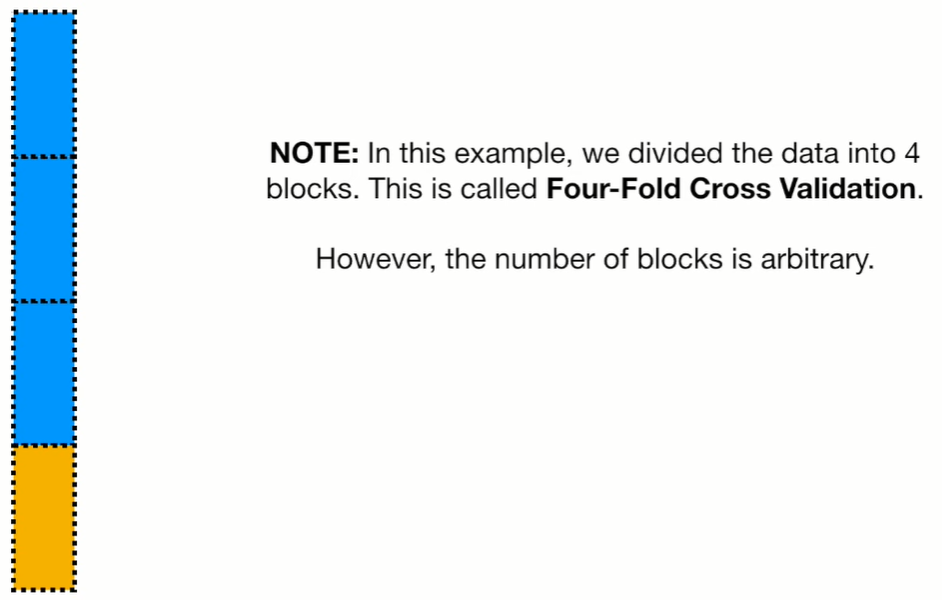
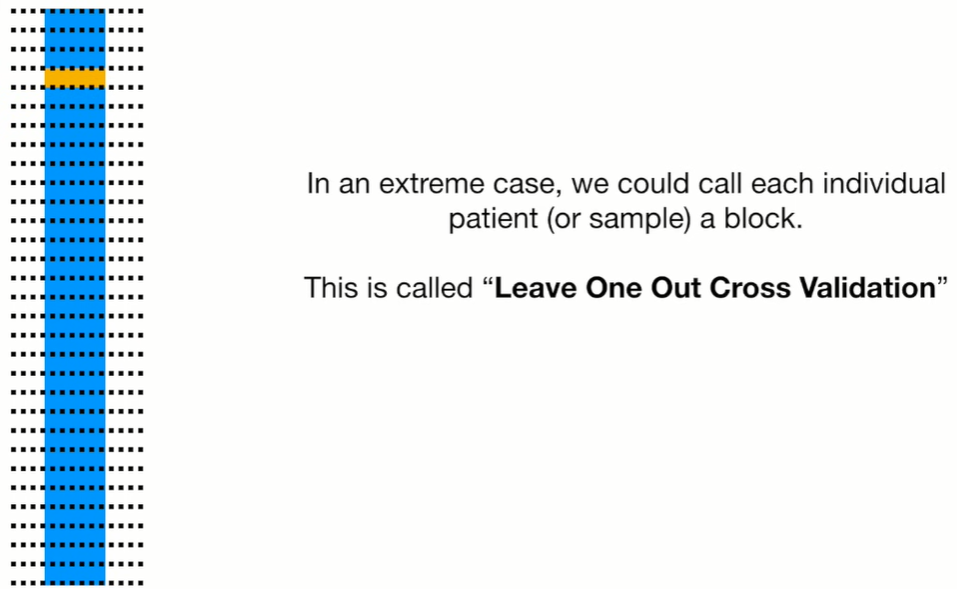
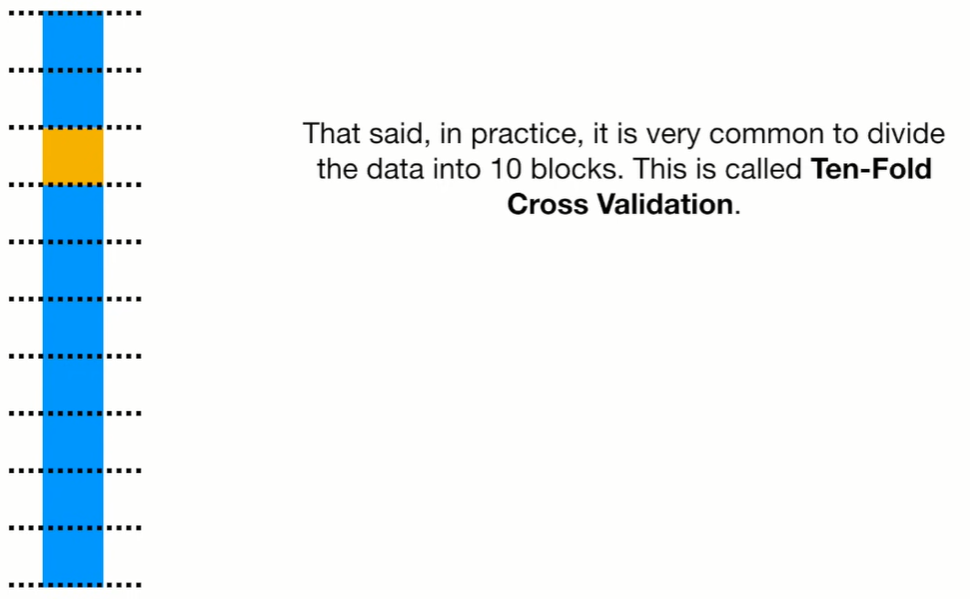

<h2>Cross-Validation With Python</h2>
Let's look at cross-validation using Python. We will be using the adult income dataset to classify people based on whether their income is above $50k or not. We will be using Linear Regression and K Nearest Neighbours classifiers and using cross-validation, we will see which one performs better.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
df = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

We have imported cross-validation module cross_val_score along with StratifiedKFold and KFold cross-validation modules.

As we can see, in our prediction class, the income is in words. Let us convert it into numeric form to make classification easier.

In [2]:
# reformatting prediction class
df['income'] = df['income'].map({'<=50K':0, '>50K':1})

Let us do the same with the gender column. At the same time, these are a bunch of relationships and marital status which can be simply converted into married or unmarried and then converted into binary classes.

In [3]:
# convert Sex value to 0 and 1
df['gender'] = df['gender'].map({'Male':0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
df['marital-status'] = df['marital-status'].replace(['Never-married', 'Divorced', 'Widowed', 'Separated'], 'Single')
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent','Married-AF-spouse'], 'Married')

df['marital-status'] = df['marital-status'].map({"Married":1, "Single":0})
df["marital-status"] = df['marital-status'].astype(int)

After dropping unnecessary columns, the dataset will be significantly reduced.

In [4]:
df.drop(labels=['workclass','education','occupation','relationship','race','native-country'], axis =1, inplace = True)
df.head()

age  fnlwgt  educational-num  marital-status  gender  capital-gain  \
0   25  226802                7               0       0             0   
1   38   89814                9               1       0             0   
2   28  336951               12               1       0             0   
3   44  160323               10               1       0          7688   
4   18  103497               10               0       1             0   

   capital-loss  hours-per-week  income  
0             0              40       0  
1             0              50       0  
2             0              40       1  
3             0              40       1  
4             0              30       0

First we create a y column for prediction and then Lets drop the income prediction class. 

In [5]:
y = df['income']
df = df.drop('income', axis = 1)

Splitting the dataset into training and testing data and creating our models.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [7]:
# Creating an empty list, Then two models are added to the list. 
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models

[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier())]

Let us perform cross-validation, first using K-Fold Cross-Validation. We have taken k as 10. We can see that linear regression performs better.

In [18]:
results = dict()
for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results[name]= (cv_results.mean(), cv_results.std())


print("name    results.mean    results.std")
for key, value in results.items():
    print(key, value)

name    results.mean    results.std
LR (0.79676465803315, 0.007893447863968865)
KNN (0.7758296593338623, 0.009605413145486371)


The process that cross_val_score uses is typical for cross validation and follows these steps:

1. The number of folds is defined, by default this is 5
2. The dataset is split up according to these folds, where each fold has a unique set of testing data
3. A model is trained and tested for each fold
4. Each fold returns a metric for it's test data
5. The mean and standard deviation of these metrics can then be calculated to provide a single metric for the process

An illustration of how this works is shown below:

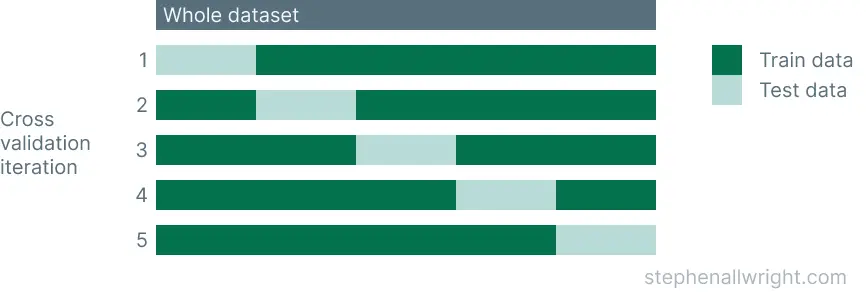